In [1]:
import os
import  re
import tensorflow as tf
import tensorflow_io as tfio

with tf.device("/device:CPU:0"):
    # lista koja ce imati sve labele glasova
    labels = list();

    # path do foldera labela
    folderPath = "../Data/lab/"
    # vraca listu imena svih datoteka u folderu
    filesLIst = os.listdir(folderPath)

    # Otvara svaki file
    for file in filesLIst:
        txtFilePath = os.path.join(folderPath, file)

        # ucitavanje linija
        try:
            with open(txtFilePath, 'r') as file:
                # Perform operations on the file
                lines = file.readlines()

        except FileNotFoundError:
            print("File not found.")

        # Iterira kroz retke filea
        for line in lines:
            # Mice \n charactere
            line = line[:-1]
            # Regex da se uzme sve poslje drugog razmaka
            result = re.search(r'^(?:\S+\s){2}(.*)$', line)
            newLabel = result.group(1)

            # ako ne postoji u listi dodaj u listu
            if newLabel not in labels:
                labels.append(newLabel)
    labels.sort()
    print(labels)

    # napravi rijecnik
    labelsDict = {label: index for index, label in enumerate(labels)}
    print(labelsDict)

['C', 'DZ', 'L', 'N', 'S', 'Z', 'a', 'a:', 'b', 'buka', 'c', 'cc', 'd', 'dz', 'e', 'e:', 'f', 'g', 'greska', 'h', 'i', 'i:', 'j', 'k', 'l', 'm', 'n', 'o', 'o:', 'p', 'r', 'r:', 's', 'sil', 't', 'u', 'u:', 'uzdah', 'v', 'z']
{'C': 0, 'DZ': 1, 'L': 2, 'N': 3, 'S': 4, 'Z': 5, 'a': 6, 'a:': 7, 'b': 8, 'buka': 9, 'c': 10, 'cc': 11, 'd': 12, 'dz': 13, 'e': 14, 'e:': 15, 'f': 16, 'g': 17, 'greska': 18, 'h': 19, 'i': 20, 'i:': 21, 'j': 22, 'k': 23, 'l': 24, 'm': 25, 'n': 26, 'o': 27, 'o:': 28, 'p': 29, 'r': 30, 'r:': 31, 's': 32, 'sil': 33, 't': 34, 'u': 35, 'u:': 36, 'uzdah': 37, 'v': 38, 'z': 39}


In [2]:
with tf.device("/device:CPU:0"):
    # lista koja ce imati tuple-ove (audioSample, indexLabele)
    data = list()

    labFolderPath = "../Data/lab/"
    wavFolderPath = "../Data/wav/"


    # lista lab i wav fileova
    labFiles = os.listdir(labFolderPath)
    wavFiles = os.listdir(wavFolderPath)

    #sample rate, pracnje progessa, broj errora
    rate = 0
    i = 0
    er = 0

    # obrisi fajlove iz liste koji nisu spareni
    labAnfWavFilesFixed = list()
    # prolazi kroz svaki lab file  za svaki wav file te ako postoji match appenda u listu
    for wavFile in wavFiles:
        match = re.search('(.*)\.', wavFile)
        if match:
            wavText = match.group(1)

        for labFile in labFiles:
            match = re.search('(.*)\.', labFile)
            if match:
                labText = match.group(1)
            if labText == wavText:
                labAnfWavFilesFixed.append((wavFile, labFile))

    print(labAnfWavFilesFixed)


    # iterira kroz wav i lab fileove
    for wavFile, labFile in labAnfWavFilesFixed:
        try:
            filename = os.path.join(wavFolderPath, wavFile)
            # otvori audio file, ako baci error preskoci
            print(wavFile + " " + labFile)

            audioFile = tfio.audio.AudioIOTensor(filename)
            rate = audioFile.rate


            # otvori lab file iteracija kroz linije
            with open(os.path.join(labFolderPath, labFile), 'r') as file:
                lines = file.readlines()
                print(wavFile + " " + labFile)
                for line in lines:
                    # regex za pocetak i kraj sample-a
                    match = re.match(r'(\d+)\s+(\d+)', line)
                    if match:
                        splitStart = float(match.group(1))
                        splitEnd = float(match.group(2))

                    line = line[:-1]
                    # Regex da se uzme sve poslje drugog razmaka, labela
                    result = re.search(r'^(?:\S+\s){2}(.*)$', line)
                    label = result.group(1)

                    splitStart = splitStart / 10000000 * 16000
                    splitEnd = splitEnd / 10000000 * 16000

                    audioSliced = audioFile[int(splitStart):int(splitEnd)]

                    audio_tensor = tf.squeeze(audioSliced, axis=[-1])

                    sampleLength = tf.size(audio_tensor).numpy()

                    # maksimalna duzinu samplea!
                    if sampleLength < 3000 and label not in ['uzdah', 'sil', 'greska', 'buka']:
                        data.append([audio_tensor, label])
            i += 1
            print(i, len(wavFiles))
            """if i > 700:
                break"""

        # ako se dogodi greska skipaj na sljedecu iteraciju
        except Exception as  e:
            er = er + 1
            print("error")
            print(e)
            continue

[('sm04010103201.wav', 'sm04010103201.lab'), ('sm04010103301.wav', 'sm04010103301.lab'), ('sm04010105101.wav', 'sm04010105101.lab'), ('sm04010105102.wav', 'sm04010105102.lab'), ('sm04010105103.wav', 'sm04010105103.lab'), ('sm04010105104.wav', 'sm04010105104.lab'), ('sm04010105105.wav', 'sm04010105105.lab'), ('sm04010105106.wav', 'sm04010105106.lab'), ('sm04010105107.wav', 'sm04010105107.lab'), ('sm04010105108.wav', 'sm04010105108.lab'), ('sm04010105109.wav', 'sm04010105109.lab'), ('sm04010105110.wav', 'sm04010105110.lab'), ('sm04010105111.wav', 'sm04010105111.lab'), ('sm04010105112.wav', 'sm04010105112.lab'), ('sm04010105113.wav', 'sm04010105113.lab'), ('sm04010105114.wav', 'sm04010105114.lab'), ('sm04010105115.wav', 'sm04010105115.lab'), ('sm04010105116.wav', 'sm04010105116.lab'), ('sm04010105117.wav', 'sm04010105117.lab'), ('sm04010105118.wav', 'sm04010105118.lab'), ('sm04010105119.wav', 'sm04010105119.lab'), ('sm04010105120.wav', 'sm04010105120.lab'), ('sm04010105121.wav', 'sm040101

In [3]:
import numpy as np
import copy
with tf.device("/device:CPU:0"):
    # Trazi maksimalnu duljinu sample-a
    max = 0
    maxValues = list()
    for i, sample in enumerate(data):
        sampleSize = tf.size(sample[0]).numpy()
        if sampleSize > max:
            max = sampleSize
            maxValues.append(sampleSize)
            print(i, "i")



    # Zero padding
    for i, sample in enumerate(copy.deepcopy(data)):
        sampleSize = tf.size(sample[0]).numpy()
        # Create tensor with zeros
        zerosTensor = tf.constant(np.zeros(max - sampleSize, dtype=int), dtype=tf.int16)
        newTensor = tf.concat([sample[0], zerosTensor], axis=0)

        data[i][0] = newTensor


    print(maxValues)


0 i
9 i
29 i
192 i
64185 i
[1664, 1792, 2816, 2944, 2945]


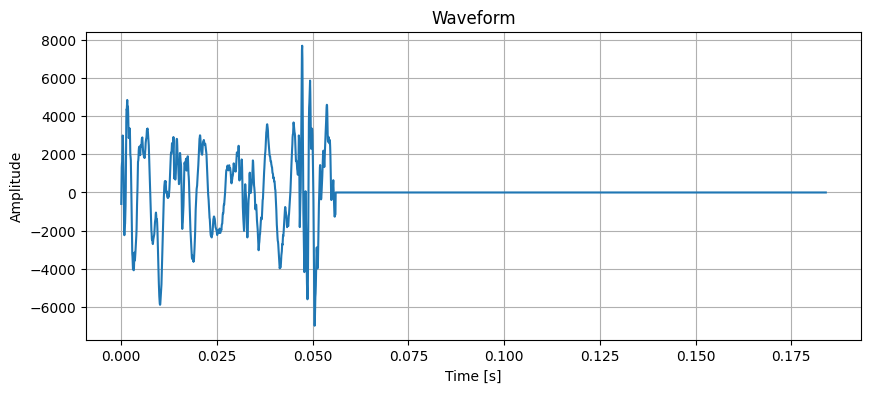

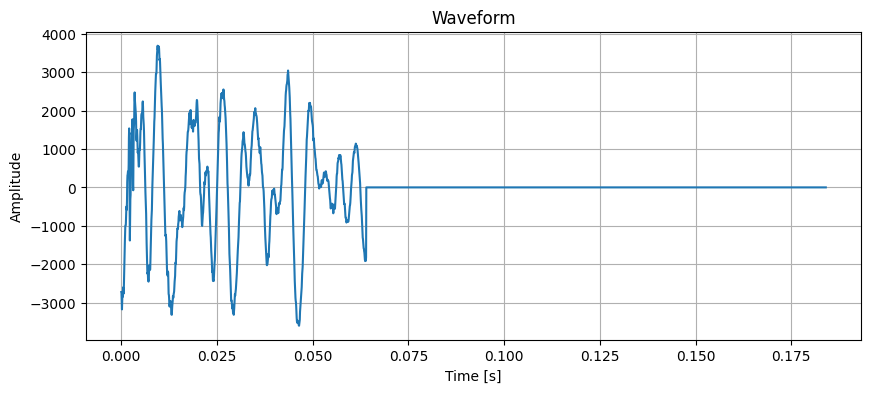

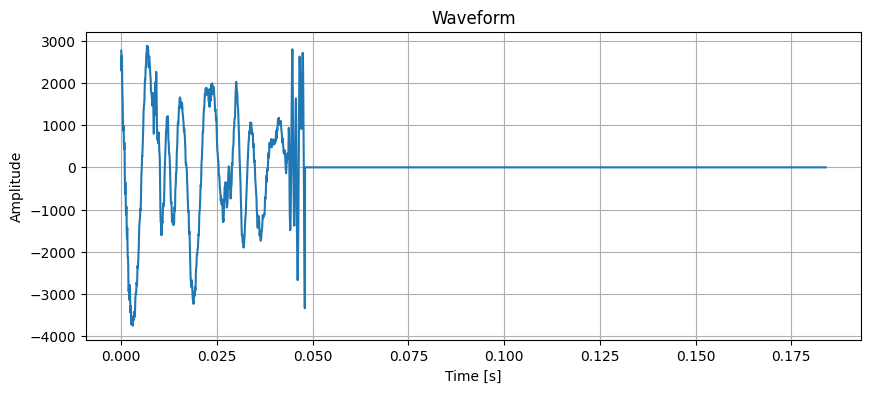

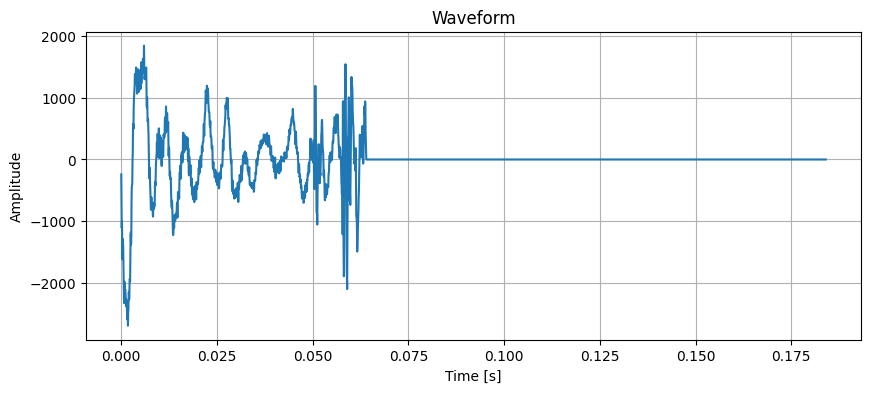

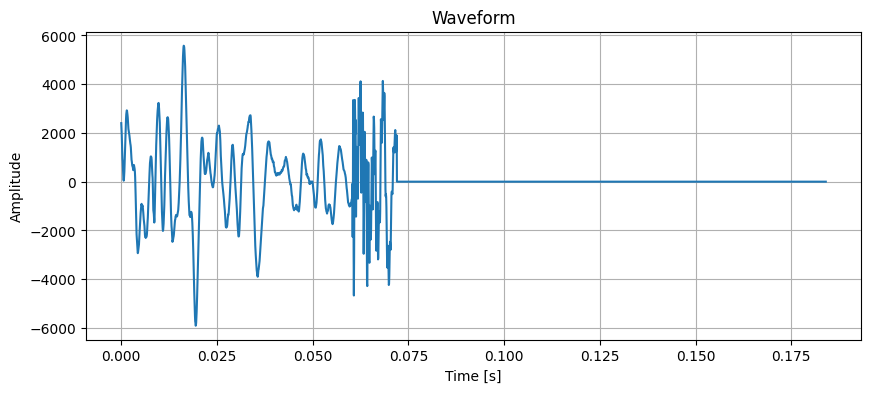

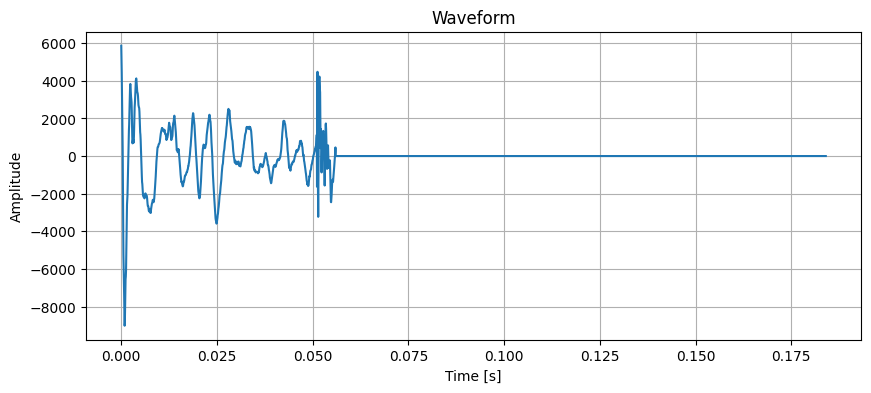

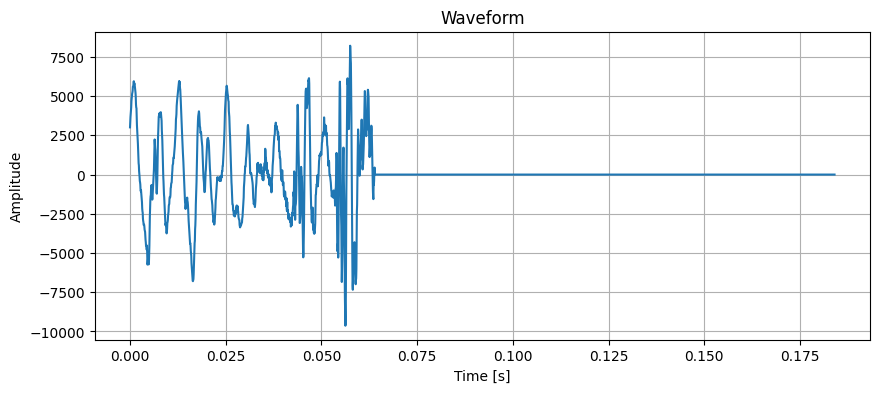

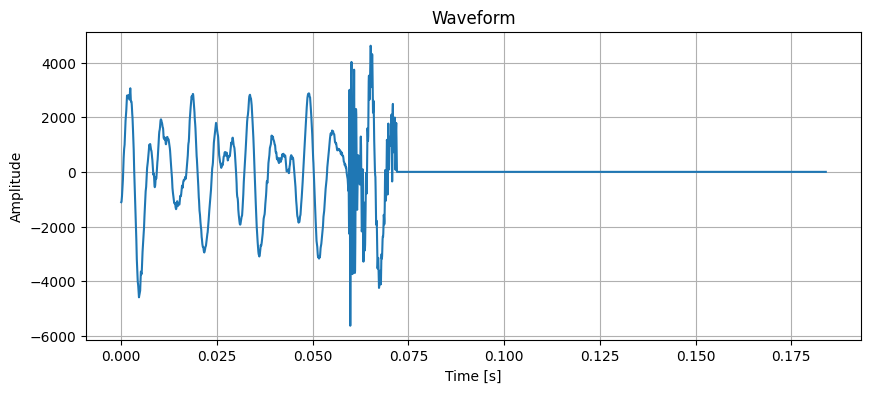

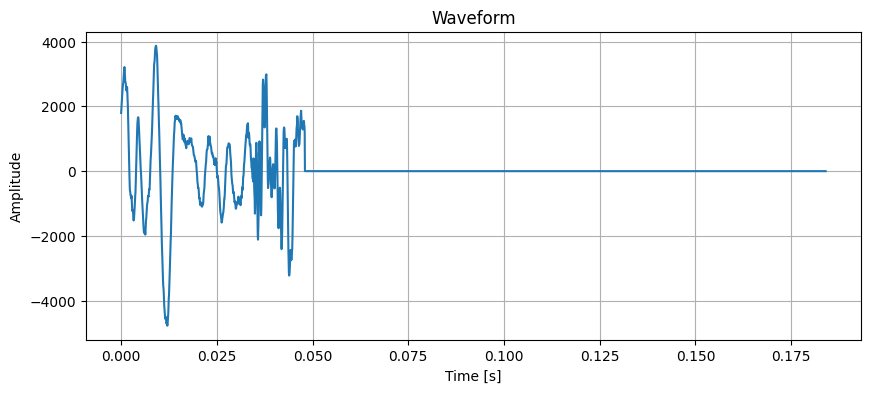

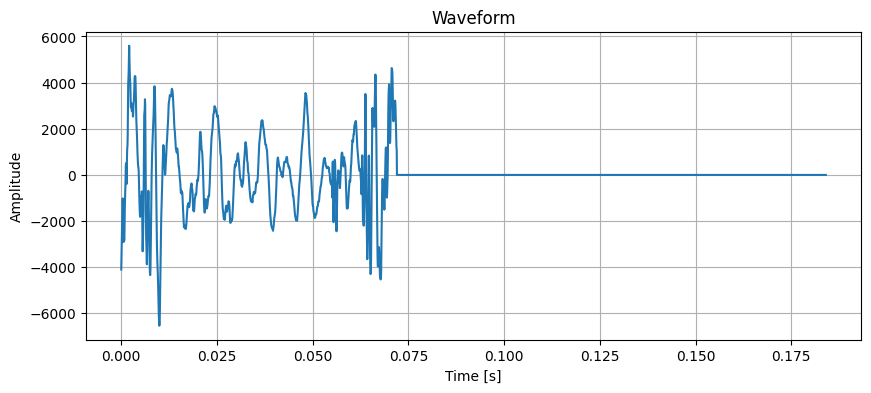

In [4]:
import matplotlib.pyplot as plt
from IPython.lib.display import Audio
import numpy as np

def plot_waveform(audio_tensor, sample_rate):
    audio_np = audio_tensor.numpy()
    time_samples = np.arange(audio_np.shape[0]) / sample_rate

    plt.figure(figsize=(10, 4))
    plt.plot(time_samples, audio_np)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.grid(True)
    plt.show()

audio_np = 1
i = 0
for index, sample in enumerate(data):
    if i == 10:
        break
    if sample[1] == 'b':
        plot_waveform(sample[0], rate)
        audio_np = sample[0].numpy()
        if i == 5:
            audio_np2 = audio_np
        Audio(data=audio_np, rate=16000)
        i += 1

In [5]:
Audio(data=audio_np, rate=16000)

In [6]:
Audio(data=audio_np2, rate=16000)

In [7]:
"""import sys
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())     ## this command list all the processing device GPU and CPU


device_name = [x.name for x in device_lib.list_local_devices() if x.device_type == 'GPU']
if device_name[0] == "/device:GPU:0":
    device_name = "/gpu:0"
    print('GPU')
else:
    print('CPU')
    device_name = "/cpu:0"
"""

'import sys\nfrom tensorflow.python.client import device_lib\nprint(device_lib.list_local_devices())     ## this command list all the processing device GPU and CPU\n\n\ndevice_name = [x.name for x in device_lib.list_local_devices() if x.device_type == \'GPU\']\nif device_name[0] == "/device:GPU:0":\n    device_name = "/gpu:0"\n    print(\'GPU\')\nelse:\n    print(\'CPU\')\n    device_name = "/cpu:0"\n'

In [8]:
# create spectograms
with tf.device("/device:CPU:0"):
    def get_spectrogram(waveform):
        #STFT.
        spectrogram = tf.signal.stft(
            waveform, frame_length=128, frame_step=64)

        spectrogram = tf.abs(spectrogram)
        # Dodavnaje jos jedne dimenzije
        # shape (`batch_size`, `height`, `width`, `channels`).
        spectrogram = spectrogram[..., tf.newaxis]
        return spectrogram


    spectData = list()
    for index, sample in enumerate(data):
        print(index)
        spectrogram = get_spectrogram(sample[0].numpy().astype(float))
        spectData.append([spectrogram, sample[1]])


    #del data

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [9]:
from IPython.display import Audio, display

i = 0
for dataSample, spectDataSample in zip(data, spectData):
    print("LABELE: " + str(dataSample[1]) + " " + str(spectDataSample[1]))
    print("WAVEFORM SHAPE: " + str(dataSample[0].shape))
    print("SPECT SHAPE: " + str(spectDataSample[0].shape))


    if i == 20000:
        break
    i += 1

LABELE: d d
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: o: o:
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: b b
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: a a
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: r r
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: v v
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: a a
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: m m
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: d d
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: a: a:
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: n n
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: p p
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: o: o:
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: S S
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: t t
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: o o
WAVEFORM SHAPE: (2945,)
SPECT SHAPE: (45, 65, 1)
LABELE: v v
WAVEFO

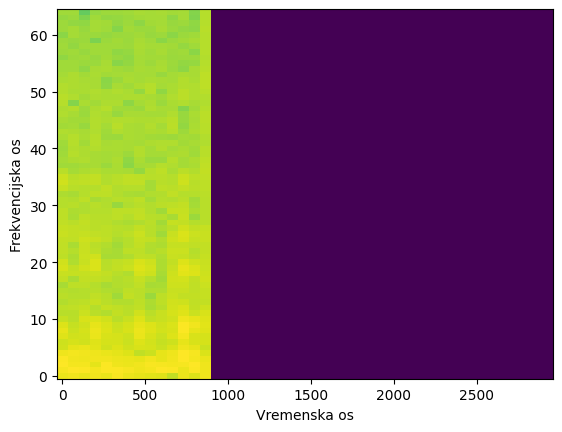

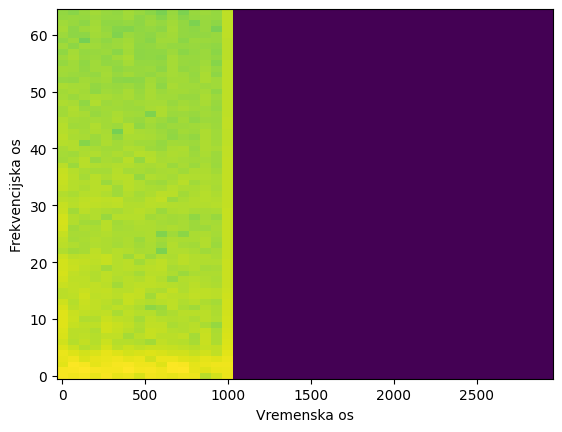

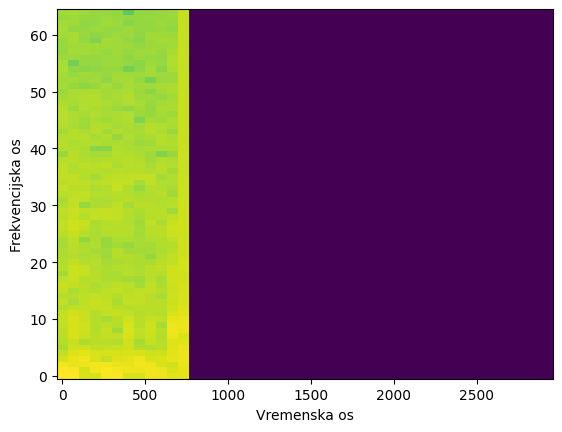

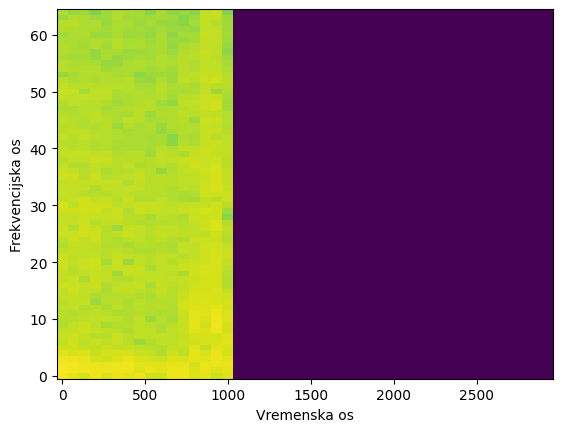

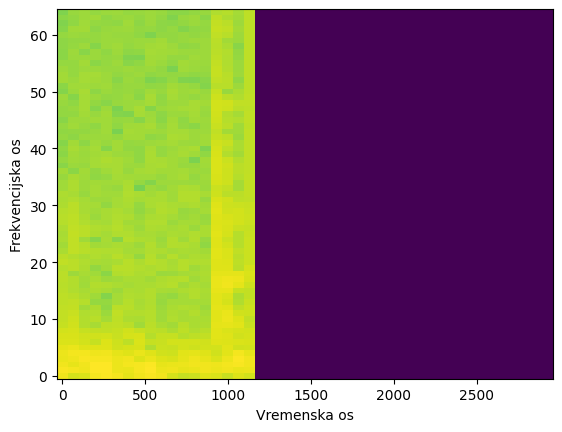

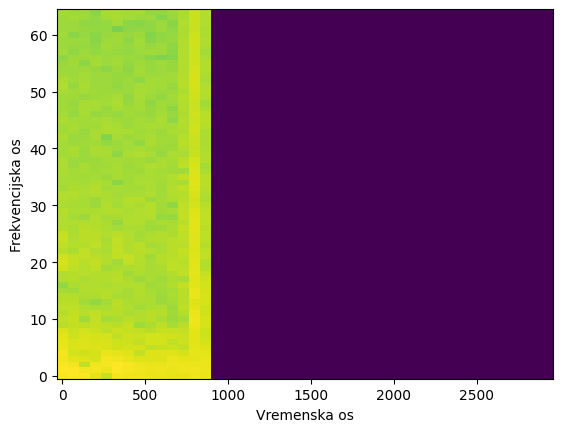

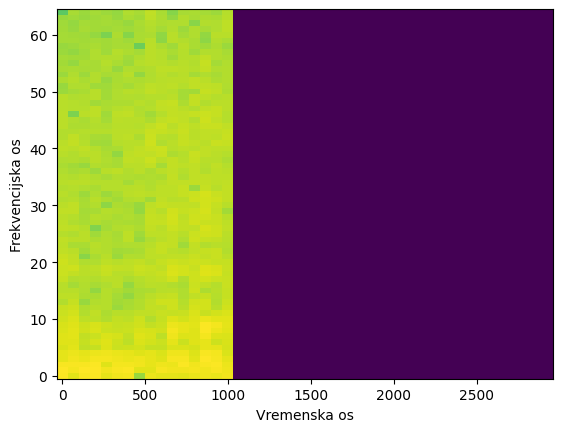

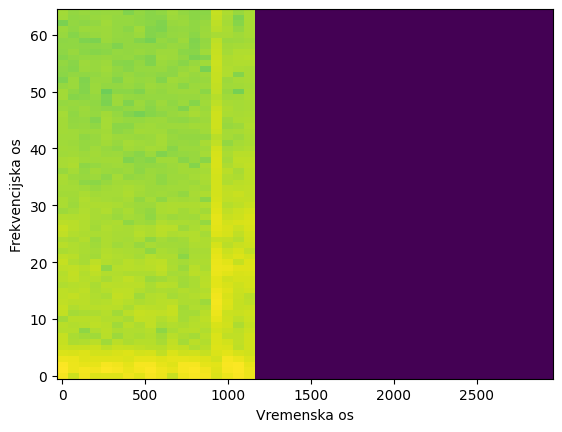

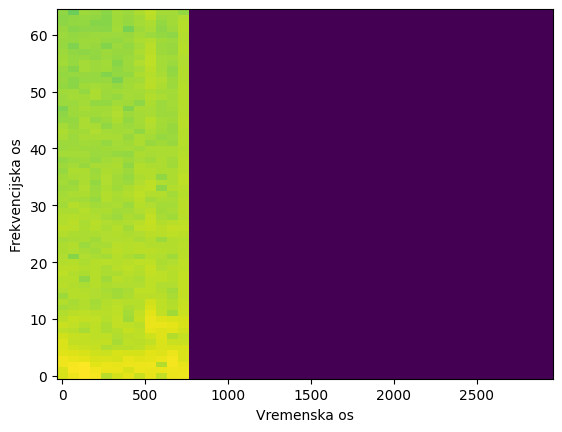

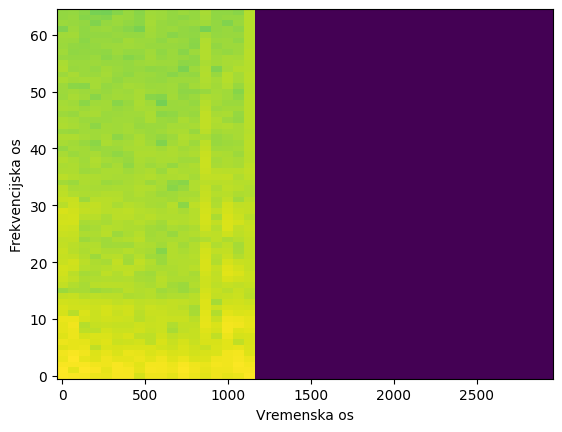

In [76]:
import matplotlib.pyplot as plt
def plot_spectrogram(spectrogram, ax):
    if len(spectrogram.shape) > 2:
        assert len(spectrogram.shape) == 3
        spectrogram = np.squeeze(spectrogram, axis=-1)
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)

i = 0
for index, sample in enumerate(spectData):
    if sample[1] == 'b':
        fig, ax = plt.subplots()
        plot_spectrogram(sample[0].numpy(), ax)
        plt.xlabel("Vremenska os")
        plt.ylabel("Frekvencijska os")
        plt.show()
        i += 1
    if i == 10:
        break

In [11]:
with tf.device("/device:CPU:0"):
    # napravi nove liste za spectograme i labele
    sampleLabels = list()
    sampleSpect = list()
    for sample in spectData:
        sampleLabels.append(sample[1])
        sampleSpect.append(sample[0])


    indexLabels = list()
    for sampleLabel in sampleLabels:
        indexLabels.append(labelsDict[sampleLabel])


    #del spectData



In [12]:
print(type(sampleSpect[1]))
print(type(indexLabels[1]))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>


In [13]:
# create tfDataset
with tf.device("/device:CPU:0"):
    tfDataset = tf.data.Dataset.from_tensor_slices((sampleSpect, indexLabels))
    print(tfDataset.element_spec)

    #del sampleSpect, sampleLabels



(TensorSpec(shape=(45, 65, 1), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))


In [14]:
for i, element in enumerate(tfDataset):
    if i == 50000:
        break
    print(element[1])

print(np.shape([
    [1, 2, 3],
    [1, 2, 3]
]))

tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(28, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(30, shape=(), dtype=int32)
tf.Tensor(38, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(26, shape=(), dtype=int32)
tf.Tensor(29, shape=(), dtype=int32)
tf.Tensor(28, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(34, shape=(), dtype=int32)
tf.Tensor(27, shape=(), dtype=int32)
tf.Tensor(38, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(26, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(32, shape=(), dtype=int32)
tf.Tensor(24, shape=(), dtype=int32)
tf.Tensor(35, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(34, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor

In [15]:
with tf.device("/device:CPU:0"):
    # Shuffle the dataset
    dataset_shuffled  = tfDataset.shuffle(buffer_size=1000, seed=42)

    # Izracun duljina train, val i test datasetova
    total_size = len(tfDataset)
    train_size = int(0.7 * total_size)  # 70% for training
    val_size = int(0.2 * total_size)  # 20% for validation
    test_size = total_size - train_size - val_size  # Remaining 10% for testing

    # raspodjela
    train_dataset = dataset_shuffled.take(train_size)
    test_and_val_dataset = dataset_shuffled.skip(train_size)
    val_dataset = test_and_val_dataset.take(val_size)
    test_dataset = test_and_val_dataset.skip(val_size)

    print(len(list(train_dataset)), len(list(val_dataset)), len(list(test_dataset)))


69760 19931 9967


In [16]:
# izrada batcheva
with tf.device("/device:CPU:0"):
    train_dataset = train_dataset.batch(8)
    val_dataset = val_dataset.batch(8)
    test_dataset = test_dataset.batch(8)

In [17]:
print(train_dataset.element_spec)

(TensorSpec(shape=(None, 45, 65, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [18]:
input_shape = train_dataset.element_spec[0].shape
print('Input shape:', input_shape[:])

for i, element in enumerate(train_dataset):
    print(element)
    if i == 2:
        break

Input shape: (None, 45, 65, 1)
(<tf.Tensor: shape=(8, 45, 65, 1), dtype=float64, numpy=
array([[[[5.90431508e+04],
         [7.45868542e+04],
         [3.40645424e+04],
         ...,
         [1.28657498e+02],
         [9.53821317e+01],
         [6.13328846e+01]],

        [[1.29687846e+04],
         [5.28104566e+04],
         [1.76480759e+04],
         ...,
         [1.28494310e+02],
         [4.67241739e+01],
         [5.45170547e+01]],

        [[3.12045777e+04],
         [2.48991699e+04],
         [3.76236244e+04],
         ...,
         [1.34179625e+02],
         [5.73236926e+01],
         [2.40196045e+01]],

        ...,

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        

In [19]:
# Izrada modela
with tf.device("/device:GPU:0"):
    from tensorflow.keras import layers
    from tensorflow.keras import models

    input_shape = train_dataset.element_spec[0].shape[1:]
    print('Input shape:', input_shape)
    num_labels = len(labels)

    # normalizacija
    norm_layer = layers.Normalization()
    norm_layer.adapt(data=train_dataset.map(map_func=lambda spec, label: spec))
    """
    # ORG MODEL
    model = models.Sequential([
        layers.Input(shape=input_shape),
        # Downsample
        layers.Resizing(32, 32),
        # Normalize.
        norm_layer,
        layers.Conv2D(32, 3, activation='relu'),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_labels),
    ])"""


    # VECA KOMPLEKSNOST
    model = models.Sequential([
        layers.Input(shape=input_shape),
        # Downsample
        layers.Resizing(32, 32),
        # Normalize.
        norm_layer,
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_labels)
    ])

    """
    # VELIKA KOMPLEKSNOST
    model = models.Sequential([
        layers.Input(shape=input_shape),
        # Downsample
        layers.Resizing(32, 32),
        # Normalize.
        norm_layer,
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),
        layers.Conv2D(256, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),
        layers.Conv2D(512, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(512, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_labels),
    ])
    """

    model.summary()


Input shape: (45, 65, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (

In [20]:
with tf.device("/device:GPU:0"):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )


In [21]:
with tf.device("/device:GPU:0"):
    EPOCHS = 10
    history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=10),
)

Epoch 1/10
8720/8720 [==============================] - 81s 9ms/step - loss: 1.9877 - accuracy: 0.3966 - val_loss: 1.4449 - val_accuracy: 0.5205
Epoch 2/10
8720/8720 [==============================] - 74s 8ms/step - loss: 1.5120 - accuracy: 0.5251 - val_loss: 1.1299 - val_accuracy: 0.6171
Epoch 3/10
8720/8720 [==============================] - 72s 8ms/step - loss: 1.3509 - accuracy: 0.5785 - val_loss: 1.0149 - val_accuracy: 0.6531
Epoch 4/10
8720/8720 [==============================] - 67s 8ms/step - loss: 1.2429 - accuracy: 0.6139 - val_loss: 1.1029 - val_accuracy: 0.6404
Epoch 5/10
8720/8720 [==============================] - 76s 9ms/step - loss: 1.1767 - accuracy: 0.6350 - val_loss: 0.9726 - val_accuracy: 0.6804
Epoch 6/10
8720/8720 [==============================] - 73s 8ms/step - loss: 1.1177 - accuracy: 0.6519 - val_loss: 0.9932 - val_accuracy: 0.6763
Epoch 7/10
8720/8720 [==============================] - 81s 9ms/step - loss: 1.0898 - accuracy: 0.6613 - val_loss: 0.8907 - val_ac

In [22]:

#Palatali
palataliSpect = list()
palataliLabels = list()

#Samoglasnici
samoglasniciSpect = list()
samoglasniciLabels = list()

# Slovo Č
CSpect = list()
CLabels = list()

#Slovo a, 6
aSpect = list()
aLabels = list()

#Slovo c, 10
cSpect = list()
cLabels = list()

#Slovo b, 8
bSpect = list()
bLabels = list()

#Slovo h, 19
hSpect = list()
hLabels = list()

for spect, label in test_dataset:
    for i in range(len(spect)):
            # Palatali
            if label[i].numpy() in (13, 11, 5, 4, 3, 2, 1, 0, 22):
                print(type(spect[i]))
                print(type(int(label[i])))
                palataliSpect.append(spect[i])
                palataliLabels.append(int(label[i]))

            #Samoglasnici
            if label[i].numpy() in (36, 35, 28, 27, 21, 20, 15, 14, 7, 6):
                print(type(spect[i]))
                print(type(int(label[i])))
                samoglasniciSpect.append(spect[i])
                samoglasniciLabels.append(int(label[i]))

            if label[i].numpy() == 8:
                bSpect.append(spect[i])
                bLabels.append(int(label[i]))

            if label[i].numpy() == 19:
                hSpect.append(spect[i])
                hLabels.append(int(label[i]))

            if label[i].numpy() == 0:
                CSpect.append(spect[i])
                CLabels.append(int(label[i]))

            if label[i].numpy() == 6:
                aSpect.append(spect[i])
                aLabels.append(int(label[i]))

            if label[i].numpy() == 10:
                cSpect.append(spect[i])
                cLabels.append(int(label[i]))

palataliDataset = tf.data.Dataset.from_tensor_slices((palataliSpect, palataliLabels))
samoglasniciDataset = tf.data.Dataset.from_tensor_slices((samoglasniciSpect, samoglasniciLabels))
CDataset = tf.data.Dataset.from_tensor_slices((CSpect, CLabels))
aDataset = tf.data.Dataset.from_tensor_slices((aSpect, aLabels))
cDataset = tf.data.Dataset.from_tensor_slices((cSpect, cLabels))
bDataset = tf.data.Dataset.from_tensor_slices((bSpect, bLabels))
hDataset = tf.data.Dataset.from_tensor_slices((hSpect, hLabels))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'int'>
<class 'tensorflow.python.framework.ops.EagerTen

In [23]:
print(len(list(palataliDataset)))
palataliDataset = palataliDataset.batch(8)
samoglasniciDataset = samoglasniciDataset.batch(8)
CDataset = CDataset.batch(8)
aDataset = aDataset.batch(8)
cDataset = cDataset.batch(8)
bDataset = bDataset.batch(8)
hDataset = hDataset.batch(8)


859


In [24]:
palataliAcc = model.evaluate(palataliDataset)[1]
samoglasniciAcc = model.evaluate(samoglasniciDataset)[1]
CAcc = model.evaluate(CDataset)[1]
aAcc = model.evaluate(aDataset)[1]
cAcc = model.evaluate(cDataset)[1]
bAcc = model.evaluate(bDataset)[1]
hAcc = model.evaluate(hDataset)[1]

10/10 [==============================] - 0s 13ms/step - loss: 1.2128 - accuracy: 0.7297


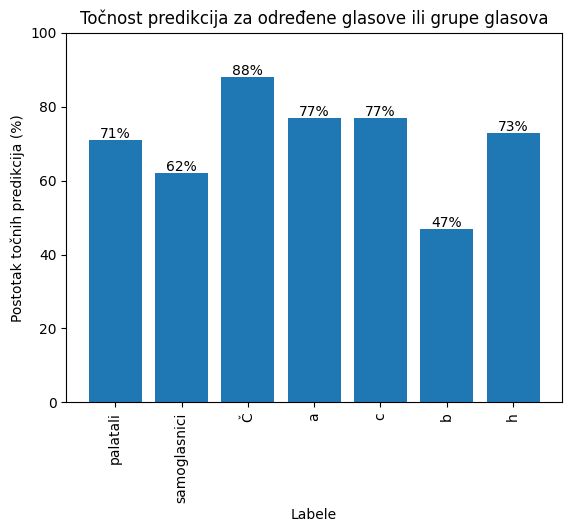

In [25]:
percentages = [palataliAcc, samoglasniciAcc, CAcc, aAcc, cAcc, bAcc, hAcc]
labels = ["palatali", "samoglasnici", "Č", "a", "c", "b", "h"]

percentages = [round(p*100) for p in percentages]


plt.bar(labels, percentages)


for i in range(len(percentages)):
    plt.text(i, percentages[i] + 0.5, str(percentages[i])+'%', ha='center')

plt.xlabel('Labele')
plt.ylabel('Postotak točnih predikcija (%)')
plt.title('Točnost predikcija za određene glasove ili grupe glasova')
plt.ylim(0, 100)
plt.xticks(rotation=90)

plt.show()

In [77]:
model.evaluate(test_dataset)

1246/1246 [==============================] - 5s 3ms/step - loss: 0.8761 - accuracy: 0.7098


[0.8760929703712463, 0.7098425030708313]